<a href="https://colab.research.google.com/github/wnyngj/class2022spring/blob/main/scikit_learn0330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn for machine learning

Scikit-러닝은 머신러닝에서 한 라이브러리

머신러닝은 딥러닝을 포함함.
*딥러닝: 인공신경망

머신러닝의 종류

1. supervised learning 함수 - 
ㄱ. regression출:숫자 
ㄴ. classification출:카테고리

2. Unsupervised learning 그냥 데이터. -
ㄱ. dimensionality(수학,영어 그래프) ㄴ. clustering

In [3]:
import seaborn as sns   #stat plotting관련해서도 많이 나오는 seaborn library
df = sns.load_dataset('iris')   
#머신러닝에서 가장 많이 나오는 ..iris데이터

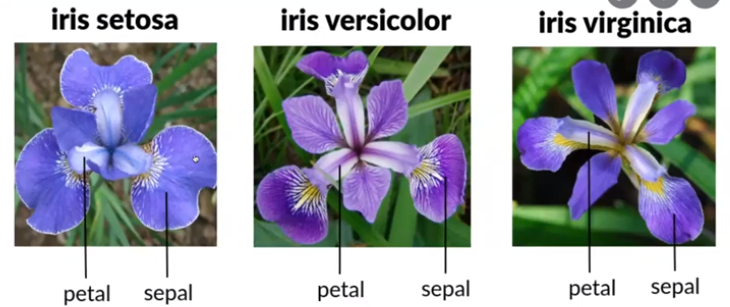

In [ ]:
type(df)    #데이터프레임(엑셀표) 형태임

In [ ]:
df.head()  
 #총150개의 iris. 3가지 붓꽃 종류 50개는 setosa, 50개는 versicolor, 50개는 virginica 
 #3가지 붓꽃 종류의 꽃잎,꽃받침의 길이나 너비 등을 기록해서 기계에 학습시키는 것

 #supervised 중 regression하려면 - sepal length입력해서 sepal width 알 수 있게
 #classification 하려면 - sepal length부터 petal_width넣어서 species 출력하기

 #Unsupervised 중 dimensional 하려면 - 4개의 구분 종류를 각각의 차원으로 설정한뒤, 2차원으로 줄이기
 #clustering하려면 4개의 구분 종류들중 몇개를 뭉치게

In [5]:
df['species'].unique()    #species의 column들 중 unique한 것들만 불러오기

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
sns.pairplot(df)
#pairwise한 표, mirror관계는 중복되는 것들도 있지   
#대각선 부분은 xy같으니 히스토그램으로 데이터분포 나타냄

In [ ]:
sns.pairplot(df, hue='species')   #색깔hue을 종별species로 하자

df를 pairplot에 몽땅 넣는 것이 아니라
원하는 것만 떼어서 볼 수 없을까?

In [ ]:
x = list(df['sepal_length'])    #x에 150개의 숫자들을 list에 넣고
y = list(df['sepal_width'])   #y에 150개의 숫자들을 list에 넣고

 #pairplot하지 않고도 matplotlib 사용해서 볼 수 있음
import matplotlib.pyplot as plt
plt.scatter(x, y);   

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

setosa만 따로 보자

In [ ]:
df_setosa = df[df['species']=='setosa'] 
#문제: 이것의 dimension구조는? row 50개, column5개 -총 4개의 이파리 정보+setosa라는 카테고리 정보

x = list(df_setosa['sepal_length'])
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);

#visualize에 decorate하자
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('setosa')

### Supervised learning: regression (linear regression)

함수가 뭐든 출력이 숫자만 나오면 regression

이 중 y=ax+b 은 linear regression(+랑 x만 있는것)

그 외 지수함수 로그함수 2차함수...곡선 함수는 non-linear regression

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression(fit_intercept=True) #intercept(= y절편)=True(=고려한다)

In [16]:
import numpy as np
x = np.array(x)   #아까 만든 것 setosa의 sepal length, 50개의 입력값이 리스트에 있음
y = np.array(y)   #아까 만든 것 setosa의 sepal width, 50개의 출력값이 리스트에 있음

#모든 머신러닝은 array의 형태로 만들어줘야함.

In [ ]:
x

In [ ]:
x.shape   #50개의 숫자 있는 1d array(1차원)

model은 데이터를 2차원으로 만들어야함
by reshape함수

In [20]:
x.reshape(50, 1) #1차원을 2차원으로
x.reshape(2,25) #reshape함수 쓰면 구조 언제든 바꿀 수 있음 숫자만 50으로 맞으면 노상관
x.reshape(5,5,2) #3차원으로도 가능~ 

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8],
       [5. , 5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9,
        4.4, 5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ]])

In [21]:
X = x.reshape(-1, 1)    #-1:알아서 계산 결과 맞게 해줘,그럼 여기선 50이겠지
X.shape

(50, 1)

In [22]:
model.fit(X, y)

LinearRegression()

In [ ]:
model.coef_ #coef(계수,즉 기울기a)

In [ ]:
model.intercept_   #intercept(y절편b)

In [17]:
xfit = np.linspace(4, 6)

In [18]:
Xfit = xfit.reshape(-1, 1)
yfit = model.predict(Xfit)

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit); 
#다시 정리: linear regression: x랑y를 관통하는 직선(linear)을 구하는 것
#왜해?: 만들어두면 나중에 sepal length를 구했을 때 sepal width 를 예측할 수 있으니까!

In [26]:
df_setosa.corr()    #x,y분포가 있을 때 이 분포들이 얼마나 집약하여 분포하는지
#r값! r값이 클수록(1에 가까울 수록) x,y의 비례정도가 크다

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


### Supervised learning: classification (Naive Bayes)

-classification중에 Naive Bayes 이외에도 SVM, Logistic regression,NN(요즘 많이 씀) 가 있음

In [ ]:
x = df.drop('species', axis=1) # axis = 0 (delete row) / 1 (delete column)
x.shape

In [ ]:
y = df['species']
y.shape

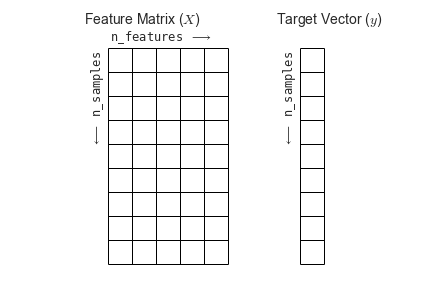

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

### Unsupervised learning: dimensionality (PCA)

principal Component Analysis

-경제,통계학과 에서 배우는 가장 기본적인 것

In [ ]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(x)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(x)  

In [ ]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);

### Unsupervised learning: clustering (GMM)

Goussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture as GMM   # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(x)                                         # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(x)                             # 4. Determine cluster labels

In [ ]:
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue='species', col='cluster', fit_reg=False);